In [ ]:
# importamos librerias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = yf.download("AAPL", period="10y")
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10864\1171632740.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="10y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-08,25.238924,25.295105,24.791721,25.113078,219374400
2015-09-09,24.753519,25.623206,24.668122,25.564778,340043200
2015-09-10,25.297356,25.456911,24.697339,24.780486,251571200
2015-09-11,25.665907,25.665907,25.115330,25.122071,199662000
2015-09-14,25.913107,26.268174,25.811981,26.198509,233453600
...,...,...,...,...,...
2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400
2025-09-02,229.720001,230.850006,226.970001,229.250000,44075600


In [4]:
# tomando datos de forma mensual
df_mensual = df.resample("ME").last()  # volver data mensual y toma el ultimo dato del mes.   # tambien puede ser .mean()
df_mensual

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-30,24.787228,25.065887,24.434409,24.758012,265892000
2015-10-31,26.854710,27.241238,26.843473,27.189550,197461200
2015-11-30,26.698833,26.949347,26.574705,26.628869,156721200
2015-12-31,23.755865,24.155331,23.656562,24.150818,163649200
2016-01-31,21.968420,21.968420,21.293615,21.392918,257666000
...,...,...,...,...,...
2025-05-31,200.622314,201.731057,196.556921,199.143981,70819900
2025-06-30,204.937408,207.154893,199.034105,201.780987,91912800


<Axes: xlabel='Date'>

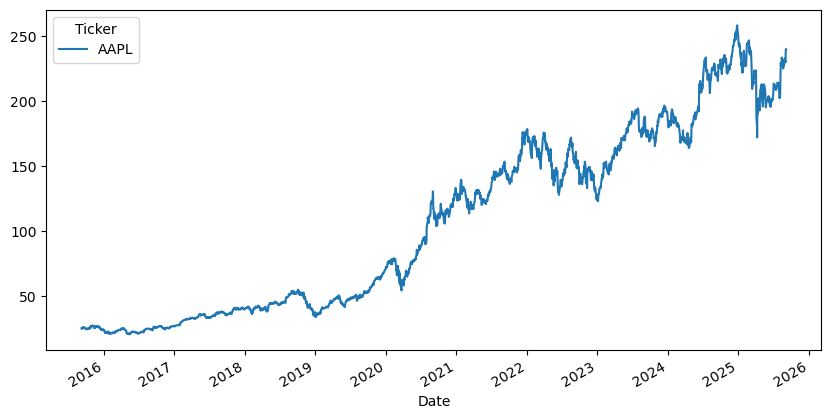

In [5]:
df["Close"].plot(figsize=(10,5))

<Axes: xlabel='Date'>

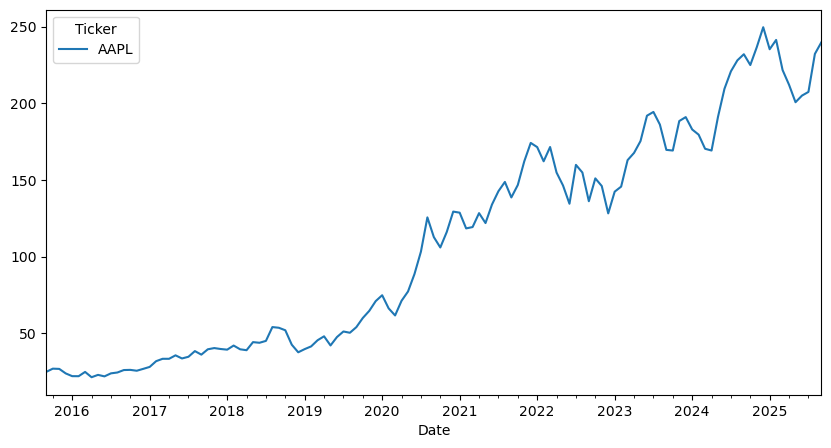

In [6]:
df_mensual["Close"].plot(figsize=(10,5))

In [21]:
from pathlib import Path

ROOT = Path.cwd() if (Path.cwd() / "data").exists() else Path.cwd().parent
DATA = ROOT / "data"

# si no recuerdas la extensión exacta, tomará xlsx/xls
ruta = next((DATA / "sp500_new").parent.glob("sp500_new.*"))

lista_sp500 = pd.read_excel(ruta)
lista_sp500


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
499,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
500,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [17]:
lista_sp500[lista_sp500["Symbol"]=="WMT"]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
482,WMT,Walmart,Consumer Staples,Consumer Staples Merchandise Retail,"Bentonville, Arkansas",1982-08-31,104169,1962


In [19]:
lista_sp500[lista_sp500["GICS Sub-Industry"]=="Consumer Staples Merchandise Retail"]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
128,COST,Costco,Consumer Staples,Consumer Staples Merchandise Retail,"Issaquah, Washington",1993-10-01,909832,1976
148,DG,Dollar General,Consumer Staples,Consumer Staples Merchandise Retail,"Goodlettsville, Tennessee",2012-12-03,29534,1939
149,DLTR,Dollar Tree,Consumer Staples,Consumer Staples Merchandise Retail,"Chesapeake, Virginia",2011-12-19,935703,1986
436,TGT,Target Corporation,Consumer Staples,Consumer Staples Merchandise Retail,"Minneapolis, Minnesota",1976-12-31,27419,1902
482,WMT,Walmart,Consumer Staples,Consumer Staples Merchandise Retail,"Bentonville, Arkansas",1982-08-31,104169,1962


In [10]:
tickers = ["AAPL", "MSFT"]
df_multi = yf.download(tickers,period="10y")["Close"]
df_multi

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10864\1816692937.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_multi = yf.download(tickers,period="10y")["Close"]
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,MSFT
Date,,
2015-09-08,25.238930,38.244686
2015-09-09,24.753519,37.530163
2015-09-10,25.297359,37.721863
2015-09-11,25.665905,37.887424
2015-09-14,25.913107,37.504036
...,...,...
2025-08-29,232.139999,506.690002
2025-09-02,229.720001,505.119995
2025-09-03,238.470001,505.350006


<Axes: xlabel='Date'>

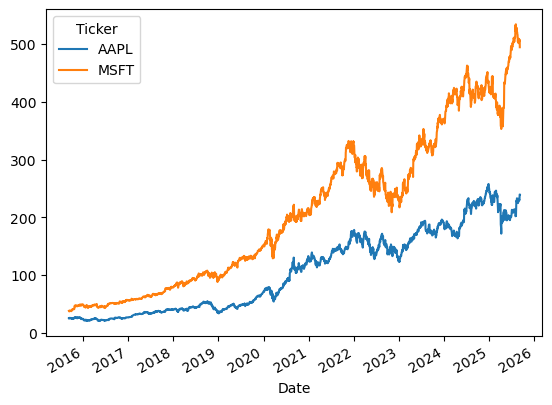

In [11]:
df_multi.plot()

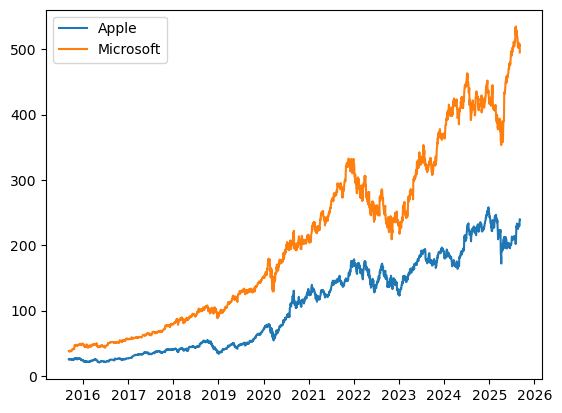

In [12]:
plt.plot(df_multi.index, df_multi["AAPL"], label= "Apple")
plt.plot(df_multi.index, df_multi["MSFT"], label= "Microsoft")
plt.legend()
plt.show()

In [13]:
df_adjust = yf.download("AAPL", period= "5y", auto_adjust=False) #una serie de cierre que incluye dividendos
df_adjust

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-09-08,109.742020,112.820000,118.989998,112.680000,113.949997,231366600
2020-09-09,114.119270,117.320000,119.139999,115.260002,117.260002,176940500
2020-09-10,110.393745,113.489998,120.500000,112.500000,120.360001,182274400
2020-09-11,108.944397,112.000000,115.230003,110.000000,114.570000,180860300
2020-09-14,112.212723,115.360001,115.930000,112.800003,114.720001,140150100
...,...,...,...,...,...,...
2025-08-29,232.139999,232.139999,233.380005,231.369995,232.509995,39418400
2025-09-02,229.720001,229.720001,230.850006,226.970001,229.250000,44075600


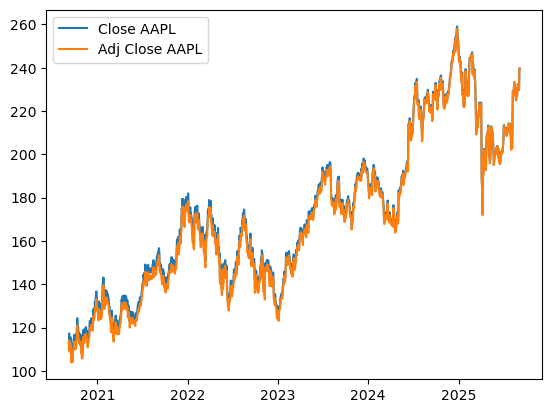

In [14]:
plt.plot(df_adjust.index, df_adjust["Close"], label = "Close AAPL")
plt.plot(df_adjust.index, df_adjust["Adj Close"], label = "Adj Close AAPL")
plt.legend()
plt.show()

In [15]:
df_adjust["ret_diario_close"]=df_adjust["Close"].pct_change()    # calcula el cambio porcentual respecto a la fila anterior, el resulado en es un decimal
df_adjust["ret_diario_adj_close"]=df_adjust["Adj Close"].pct_change() #  adj close refleja mejor el retorno total (incluye dividendo y corrige splits)
df_adjust

Price,Adj Close,Close,High,Low,Open,Volume,ret_diario_close,ret_diario_adj_close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2020-09-08,109.742020,112.820000,118.989998,112.680000,113.949997,231366600,NaN,NaN
2020-09-09,114.119270,117.320000,119.139999,115.260002,117.260002,176940500,0.039887,0.039887
2020-09-10,110.393745,113.489998,120.500000,112.500000,120.360001,182274400,-0.032646,-0.032646
2020-09-11,108.944397,112.000000,115.230003,110.000000,114.570000,180860300,-0.013129,-0.013129
2020-09-14,112.212723,115.360001,115.930000,112.800003,114.720001,140150100,0.030000,0.030000
...,...,...,...,...,...,...,...,...
2025-08-29,232.139999,232.139999,233.380005,231.369995,232.509995,39418400,-0.001806,-0.001806
2025-09-02,229.720001,229.720001,230.850006,226.970001,229.250000,44075600,-0.010425,-0.010425


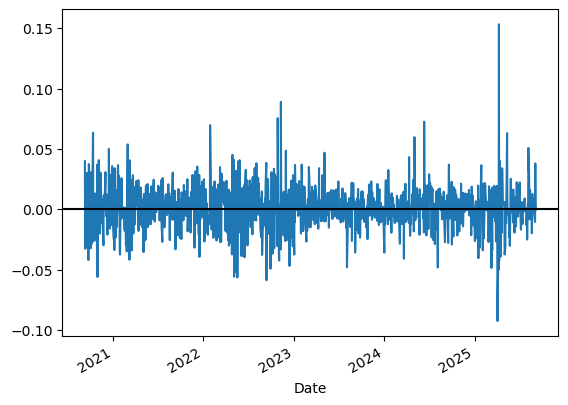

In [16]:
df_adjust["ret_diario_close"].plot
df_adjust["ret_diario_adj_close"].plot()
plt.axhline(0, color="black")
plt.show()

In [17]:
df_adjust["ret_diario_close_acumulado"] = (1+df_adjust["ret_diario_close"]).cumprod()-1  # el cumprod es el producto acumulado de los factores y el -1 lo convierte nuevamente a retorno acumulado
df_adjust["ret_diario_adj_close_acumulado"] = (1+df_adjust["ret_diario_adj_close"]).cumprod()-1
df_adjust

Price,Adj Close,Close,High,Low,Open,Volume,ret_diario_close,ret_diario_adj_close,ret_diario_close_acumulado,ret_diario_adj_close_acumulado
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,,
2020-09-08,109.742020,112.820000,118.989998,112.680000,113.949997,231366600,NaN,NaN,NaN,NaN
2020-09-09,114.119270,117.320000,119.139999,115.260002,117.260002,176940500,0.039887,0.039887,0.039887,0.039887
2020-09-10,110.393745,113.489998,120.500000,112.500000,120.360001,182274400,-0.032646,-0.032646,0.005939,0.005939
2020-09-11,108.944397,112.000000,115.230003,110.000000,114.570000,180860300,-0.013129,-0.013129,-0.007268,-0.007268
2020-09-14,112.212723,115.360001,115.930000,112.800003,114.720001,140150100,0.030000,0.030000,0.022514,0.022514
...,...,...,...,...,...,...,...,...,...,...
2025-08-29,232.139999,232.139999,233.380005,231.369995,232.509995,39418400,-0.001806,-0.001806,1.057614,1.115325
2025-09-02,229.720001,229.720001,230.850006,226.970001,229.250000,44075600,-0.010425,-0.010425,1.036164,1.093273


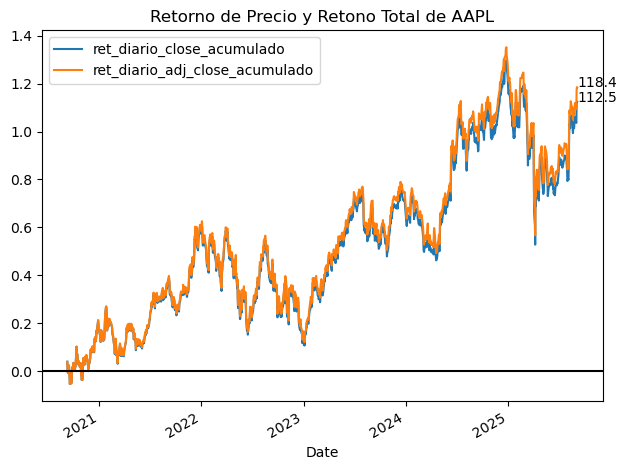

In [18]:
# Visualizando el retorno acumulado... retorno que solo incluye ganancias de capital es close... retorno que incluye ganancias de capital y dividendos es el adj close
df_adjust["ret_diario_close_acumulado"].plot()
plt.text(df_adjust.index[-1], df_adjust["ret_diario_close_acumulado"].iloc[-1], round(df_adjust["ret_diario_close_acumulado"].iloc[-1]*100,1))  # convierte ese retonor en porcentaje y lo redondea 1 decimal

df_adjust["ret_diario_adj_close_acumulado"].plot()
plt.text(df_adjust.index[-1], df_adjust["ret_diario_adj_close_acumulado"].iloc[-1], round(df_adjust["ret_diario_adj_close_acumulado"].iloc[-1]*100,1))

plt.title("Retorno de Precio y Retono Total de AAPL")
plt.axhline(0, color = "black")
plt.legend()
plt.tight_layout()
plt.show()



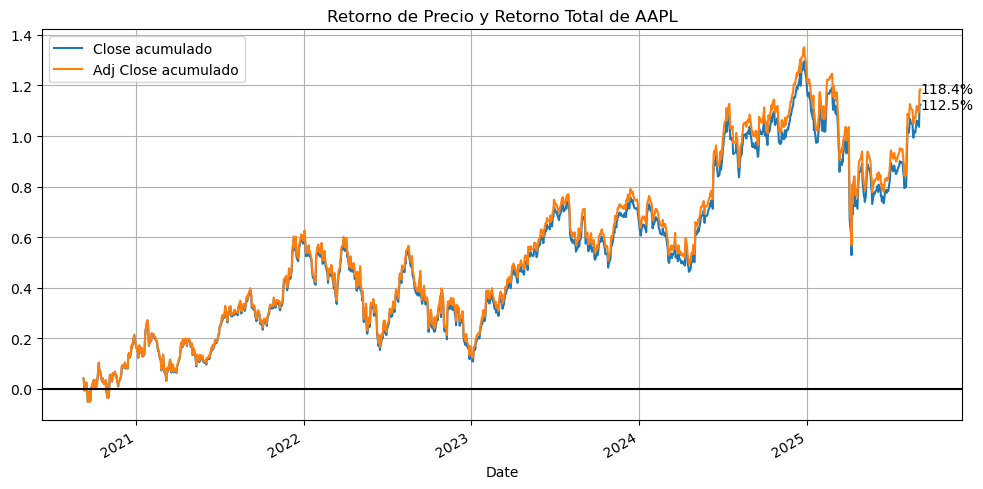

In [19]:
plt.figure(figsize=(10,5))
df_adjust["ret_diario_close_acumulado"].plot(label="Close acumulado")
df_adjust["ret_diario_adj_close_acumulado"].plot(label="Adj Close acumulado")

# Anotar con símbolo % y pequeño desplazamiento para que no se corte
for col in ["ret_diario_close_acumulado", "ret_diario_adj_close_acumulado"]:  # Recorre una lista de nombres de columnas. En cada vuelta, col vale uno de esos strings.
    y = df_adjust[col].iloc[-1]
    plt.text(df_adjust.index[-1], y, f"{y*100:.1f}%", ha="left", va="center")  # f"{y*100:.1f}%" → convierte el valor a porcentaje y lo formatea con 1 decimal

plt.title("Retorno de Precio y Retorno Total de AAPL")
plt.axhline(0, color="black")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# COMPARACION ENTRE RETORNOS ACUMULADOS DE VARIAS COMPAÑÍAS
tickers_tech = ["MSFT", "AAPL", "NVDA", "GOOGL", "META", "TSLA", "AMZN", "SPY"]

In [21]:
df_m7 = yf.download(tickers_tech,period="1y",auto_adjust=False)["Adj Close"]
df_m7

[*********************100%***********************]  8 of 8 completed


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,
2024-09-06,219.797058,171.389999,150.192444,498.562866,398.706696,102.797516,533.712585,210.729996
2024-09-09,219.886642,175.399994,148.189499,503.067444,402.696747,106.436378,539.688110,216.270004
2024-09-10,219.090347,179.550003,148.139664,503.067444,411.113586,108.065857,542.038757,226.169998
2024-09-11,221.628540,184.520004,150.630920,510.083435,419.887695,116.873077,547.599548,228.130005
2024-09-12,221.738037,187.000000,154.148560,523.806396,423.818146,119.112564,552.212097,229.809998
...,...,...,...,...,...,...,...,...
2025-08-29,232.139999,229.000000,212.910004,738.700012,506.690002,174.179993,645.049988,333.869995
2025-09-02,229.720001,225.339996,211.350006,735.109985,505.119995,170.779999,640.270020,329.359985
2025-09-03,238.470001,225.990005,230.660004,737.049988,505.350006,170.619995,643.739990,334.089996


In [ ]:
# Bucle que nos permite calcular retorno total diario para las Magnificas 7 en horizonte de 1 año
for i in tickers_tech:   # tickers_tech lista de simnnolos, el for recorre cada ticker y lo guarda en i
    df_m7["ret_diario"+i]= df_m7[i].pct_change()  # crea una nueva columna por cada ticker con su retorno diario en cambio porcentual
df_m7    

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,SPY,TSLA,ret_diarioMSFT,ret_diarioAAPL,...,ret_diarioAMZN,ret_diarioSPY,ret_diario_MSFT,ret_diario_AAPL,ret_diario_NVDA,ret_diario_GOOGL,ret_diario_META,ret_diario_TSLA,ret_diario_AMZN,ret_diario_SPY
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-06,219.797058,171.389999,150.192444,498.562866,398.706696,102.797516,533.712585,210.729996,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-09,219.886642,175.399994,148.189499,503.067444,402.696747,106.436378,539.688110,216.270004,0.010007,0.000408,...,0.023397,0.011196,0.010007,0.000408,0.035398,-0.013336,0.009035,0.026290,0.023397,0.011196
2024-09-10,219.090347,179.550003,148.139664,503.067444,411.113586,108.065857,542.038757,226.169998,0.020901,-0.003621,...,0.023660,0.004356,0.020901,-0.003621,0.015309,-0.000336,0.000000,0.045776,0.023660,0.004356
2024-09-11,221.628540,184.520004,150.630920,510.083435,419.887695,116.873077,547.599548,228.130005,0.021342,0.011585,...,0.027680,0.010259,0.021342,0.011585,0.081499,0.016817,0.013946,0.008666,0.027680,0.010259
2024-09-12,221.738037,187.000000,154.148560,523.806396,423.818146,119.112564,552.212097,229.809998,0.009361,0.000494,...,0.013440,0.008423,0.009361,0.000494,0.019162,0.023353,0.026903,0.007364,0.013440,0.008423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-29,232.139999,229.000000,212.910004,738.700012,506.690002,174.179993,645.049988,333.869995,-0.005788,-0.001806,...,-0.011226,-0.005964,-0.005788,-0.001806,-0.033246,0.006001,-0.016522,-0.035002,-0.011226,-0.005964
2025-09-02,229.720001,225.339996,211.350006,735.109985,505.119995,170.779999,640.270020,329.359985,-0.003099,-0.010425,...,-0.015983,-0.007410,-0.003099,-0.010425,-0.019520,-0.007327,-0.004860,-0.013508,-0.015983,-0.007410
2025-09-03,238.470001,225.990005,230.660004,737.049988,505.350006,170.619995,643.739990,334.089996,0.000455,0.038090,...,0.002885,0.005420,0.000455,0.038090,-0.000937,0.091365,0.002639,0.014361,0.002885,0.005420


In [26]:
for i in tickers_tech:
    df_m7["ret_diario_acumulado"+i]= (1+df_m7["ret_diario"+i]).cumprod()-1
df_m7       

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,SPY,TSLA,ret_diarioMSFT,ret_diarioAAPL,...,ret_diario_AMZN,ret_diario_SPY,ret_diario_acumuladoMSFT,ret_diario_acumuladoAAPL,ret_diario_acumuladoNVDA,ret_diario_acumuladoGOOGL,ret_diario_acumuladoMETA,ret_diario_acumuladoTSLA,ret_diario_acumuladoAMZN,ret_diario_acumuladoSPY
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-06,219.797058,171.389999,150.192444,498.562866,398.706696,102.797516,533.712585,210.729996,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-09,219.886642,175.399994,148.189499,503.067444,402.696747,106.436378,539.688110,216.270004,0.010007,0.000408,...,0.023397,0.011196,0.010007,0.000408,0.035398,-0.013336,0.009035,0.026290,0.023397,0.011196
2024-09-10,219.090347,179.550003,148.139664,503.067444,411.113586,108.065857,542.038757,226.169998,0.020901,-0.003621,...,0.023660,0.004356,0.031118,-0.003215,0.051250,-0.013668,0.009035,0.073269,0.047611,0.015600
2024-09-11,221.628540,184.520004,150.630920,510.083435,419.887695,116.873077,547.599548,228.130005,0.021342,0.011585,...,0.027680,0.010259,0.053124,0.008333,0.136925,0.002919,0.023108,0.082570,0.076609,0.026020
2024-09-12,221.738037,187.000000,154.148560,523.806396,423.818146,119.112564,552.212097,229.809998,0.009361,0.000494,...,0.013440,0.008423,0.062982,0.008831,0.158711,0.026340,0.050633,0.090542,0.091079,0.034662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-29,232.139999,229.000000,212.910004,738.700012,506.690002,174.179993,645.049988,333.869995,-0.005788,-0.001806,...,-0.011226,-0.005964,0.270834,0.056156,0.694399,0.417581,0.481659,0.584350,0.336134,0.208609
2025-09-02,229.720001,225.339996,211.350006,735.109985,505.119995,170.779999,640.270020,329.359985,-0.003099,-0.010425,...,-0.015983,-0.007410,0.266896,0.045146,0.661324,0.407195,0.474458,0.562948,0.314779,0.199653
2025-09-03,238.470001,225.990005,230.660004,737.049988,505.350006,170.619995,643.739990,334.089996,0.000455,0.038090,...,0.002885,0.005420,0.267473,0.084955,0.659768,0.535763,0.478349,0.585394,0.318572,0.206155


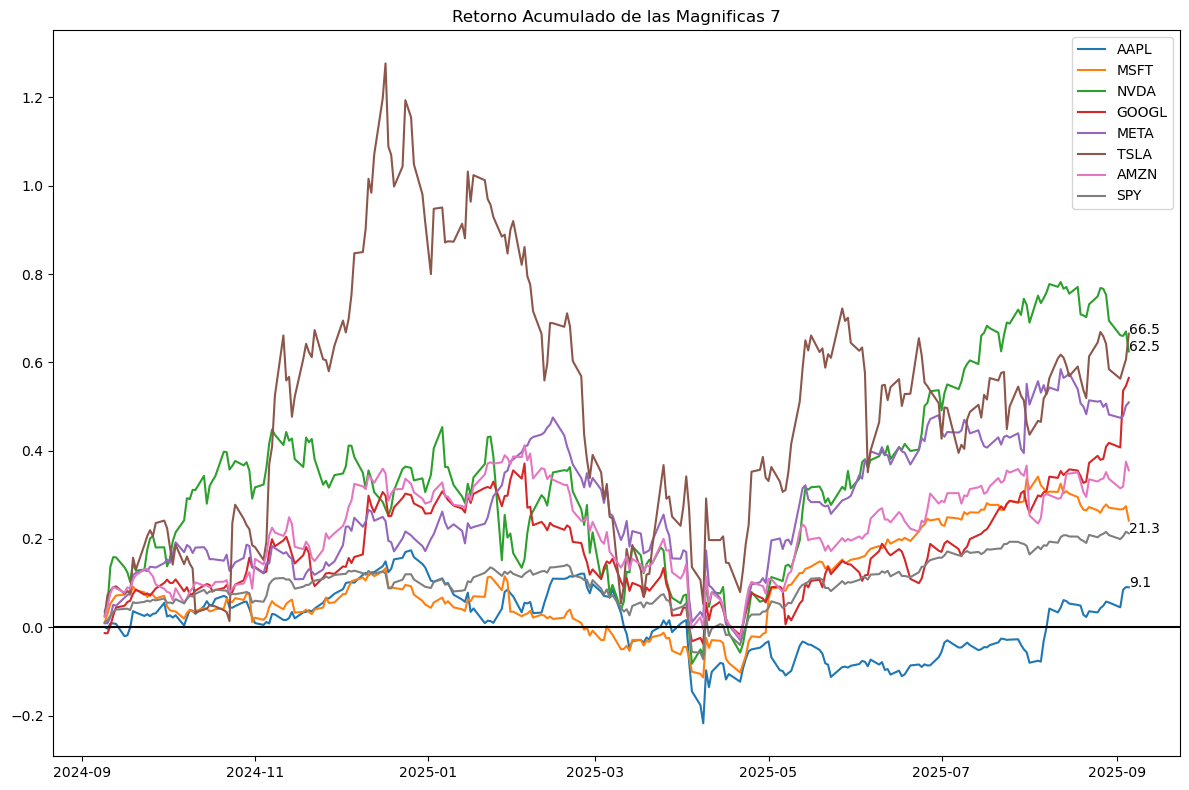

In [32]:
plt.figure(figsize=(12,8))
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoAAPL"],label="AAPL")
plt.text(df_m7.index[-1],df_m7["ret_diario_acumuladoAAPL"].iloc[-1],round(df_m7["ret_diario_acumuladoAAPL"].iloc[-1]*100,1))
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoMSFT"],label="MSFT")
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoNVDA"],label="NVDA")
plt.text(df_m7.index[-1],df_m7["ret_diario_acumuladoNVDA"].iloc[-1],round(df_m7["ret_diario_acumuladoNVDA"].iloc[-1]*100,1))
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoGOOGL"],label="GOOGL")
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoMETA"],label="META")
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoTSLA"],label="TSLA")
plt.text(df_m7.index[-1],df_m7["ret_diario_acumuladoTSLA"].iloc[-1],round(df_m7["ret_diario_acumuladoTSLA"].iloc[-1]*100,1))
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoAMZN"],label="AMZN")
plt.plot(df_m7.index,df_m7["ret_diario_acumuladoSPY"],label="SPY")
plt.text(df_m7.index[-1],df_m7["ret_diario_acumuladoSPY"].iloc[-1],round(df_m7["ret_diario_acumuladoSPY"].iloc[-1]*100,1))
plt.title("Retorno Acumulado de las Magnificas 7")
plt.legend()
plt.axhline(0,color="black")
plt.tight_layout()
plt.show()


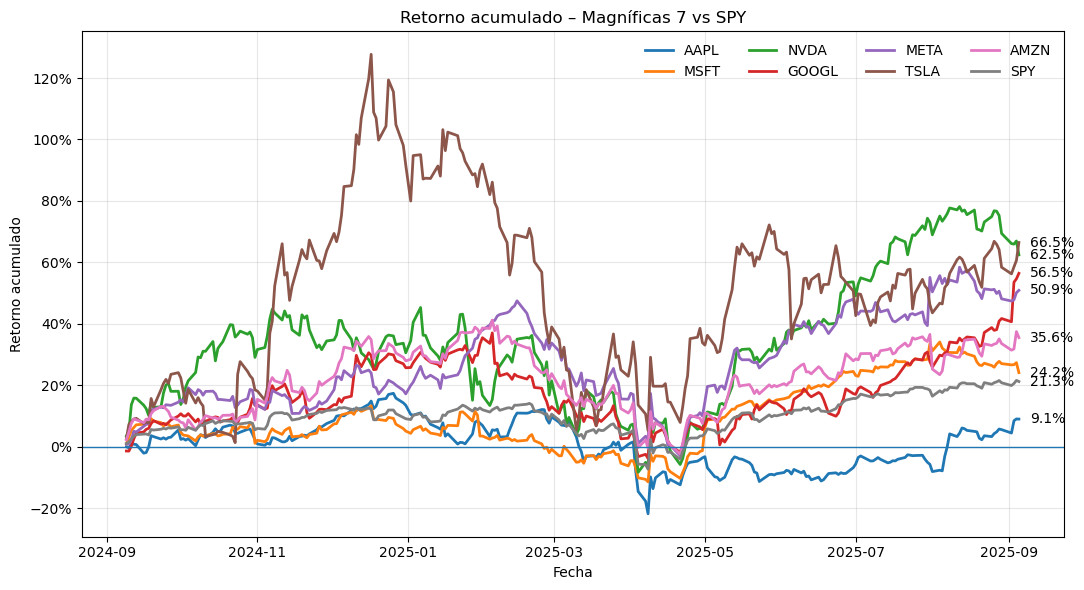

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tickers = ["AAPL","MSFT","NVDA","GOOGL","META","TSLA","AMZN","SPY"]
prefix = "ret_diario_acumulado"  # ajusta si tu prefijo es otro

plt.figure(figsize=(11,6))
ax = plt.gca()

for t in tickers:
    col = f"{prefix}{t}"         # p.ej. ret_diario_acumuladoAAPL
    if col not in df_m7.columns:
        continue
    y = df_m7[col].dropna()
    if y.empty:
        continue

    ax.plot(y.index, y, label=t, linewidth=2)

    # etiqueta del último punto, con un pequeño desplazamiento para que no se corte
    ax.annotate(f"{y.iloc[-1]*100:.1f}%",
                xy=(y.index[-1], y.iloc[-1]),
                xytext=(8, 0), textcoords="offset points",
                ha="left", va="center")

ax.set_title("Retorno acumulado – Magníficas 7 vs SPY")
ax.set_xlabel("Fecha")
ax.set_ylabel("Retorno acumulado")
ax.axhline(0, linewidth=1)
ax.grid(True, alpha=0.3)
ax.legend(ncol=4, frameon=False)

# Muestra el eje Y como porcentaje (los datos están en decimales)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()
